## Data exploration - neurons

In [1]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(RColorBrewer)
library(gridExtra)
library(ggh4x)

Attaching SeuratObject

Attaching sp


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




### Re-save / load object

In [34]:
# save this embedding with updated clustering and metadata labels
saveRDS(neu_pool, file = "/local/Nina/jupyterlab/brains_trans/neu_pool_reg.rds")

In [2]:
# for re-loading
neu_pool <- readRDS(file = "/local/Nina/jupyterlab/brains_trans/neu_pool_reg.rds")

### Plot with improved aesthetics

#### UMAP of detailed cell types

For the manuscript given the small size of the UMAP (on of the smaller subsets in Fig1) it will not be possible to display the full names on the UMAP, so I will display the number and then include the full cluster name as text in caption.

In [3]:
# restore "corrected" numeric cluster names
Idents(neu_pool) <- neu_pool$pc30_res0.8_clusters_numeric_edited

Given that I have 23 clusters, color selection so as to uniquely recognize them is ratehr difficult. I will ratehr generate a pallette with enough distinction that closely related clusters can be visually separated and rely on numeric labels to indicate each cluster.  
My solution for expanding the palette is based on https://r-graph-gallery.com/40-rcolorbrewer-get-a-longer-palette.html  
I try to keep it color-coordinated with the main cell types UMAP ie neurons are in shades of blue. 

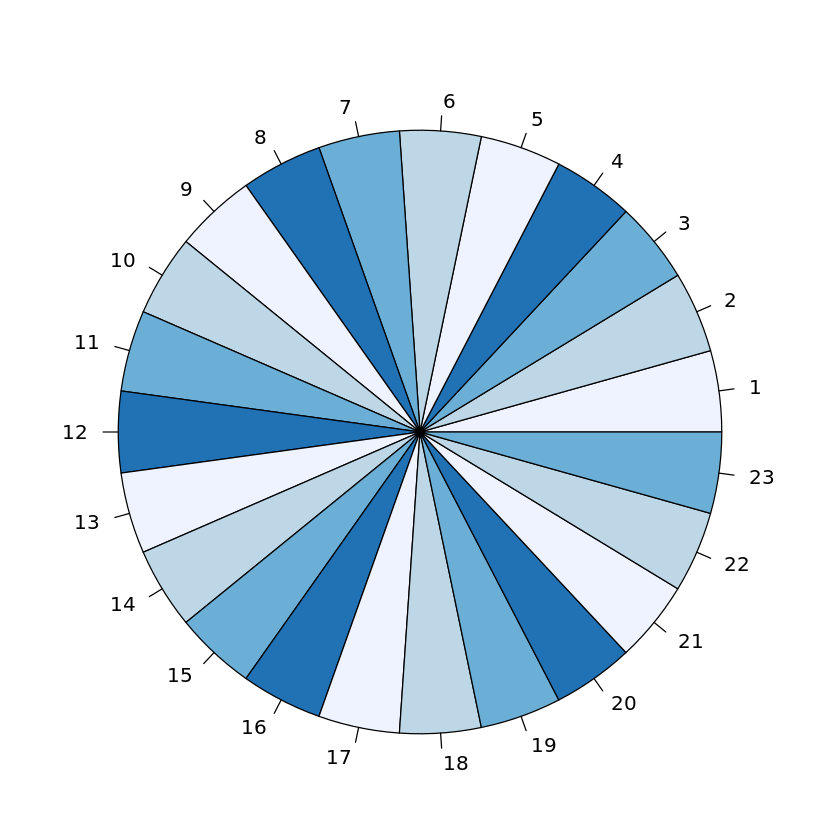

In [4]:
# No margin
par(mar=c(0,0,1,0))

# start with basic palette of Rcolor brewer, with 4 colors
col <- brewer.pal(4, "Blues") 

# Add more colors to this palette :
neu_col <- colorRampPalette(col)(23)

# Plot it
pie(rep(1, length(neu_col)), col = col , main="")

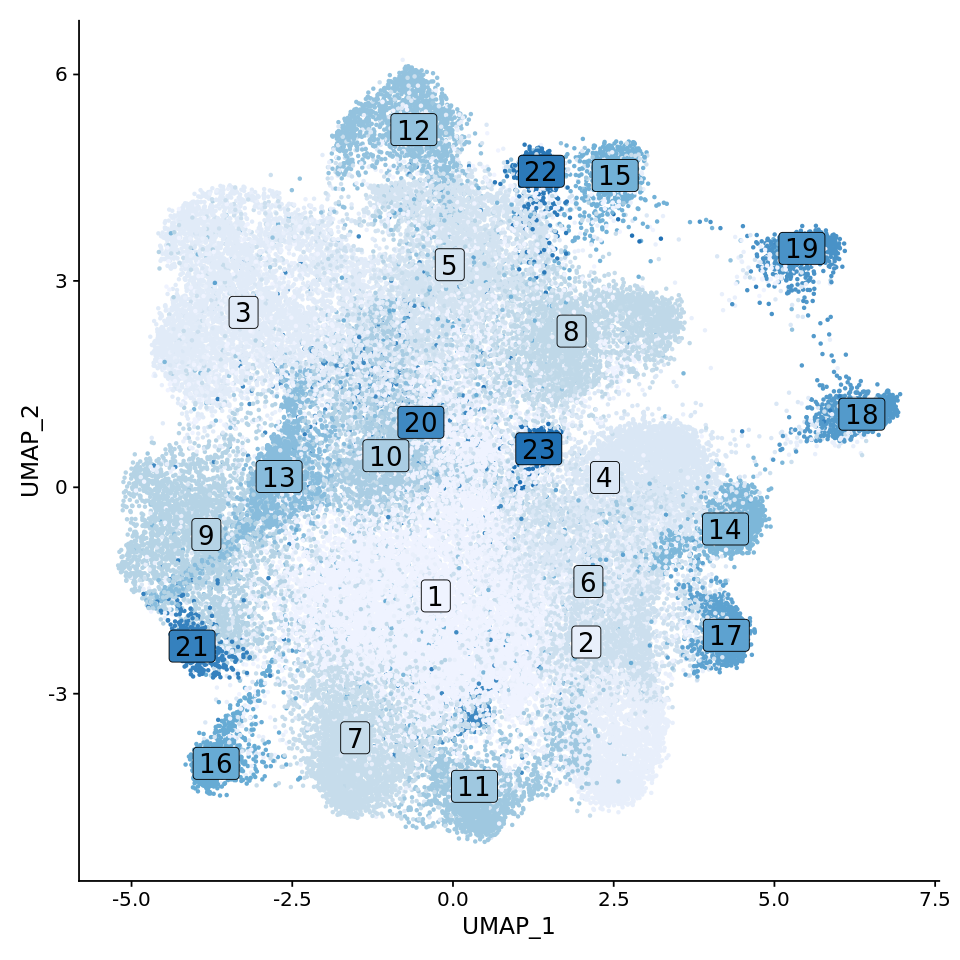

In [5]:
options(repr.plot.width=8, repr.plot.height=8)

umap_num <- DimPlot(neu_pool, label = TRUE, cols = neu_col, 
        label.size = 5.5, label.box = TRUE, pt.size = 0.6, raster = FALSE) + NoLegend()
umap_num

In [6]:
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/neu_umap_numbered.pdf", 
       plot = umap_num, 
       units = "in", height = 6, width = 6)


#### Markers - need to reorder!

In [8]:
Idents(neu_pool) <- "pc30_res0.8_clusters_numeric_edited"

In [10]:
table(neu_pool@active.ident)


    1     2     3     4     5     6     7     8     9    10    11    12    13 
12148  6899  5863  5679  4054  3866  3832  3507  3499  2464  1909  1711  1639 
   14    15    16    17    18    19    20    21    22    23 
 1313   890   888   830   809   807   793   493   452   237 

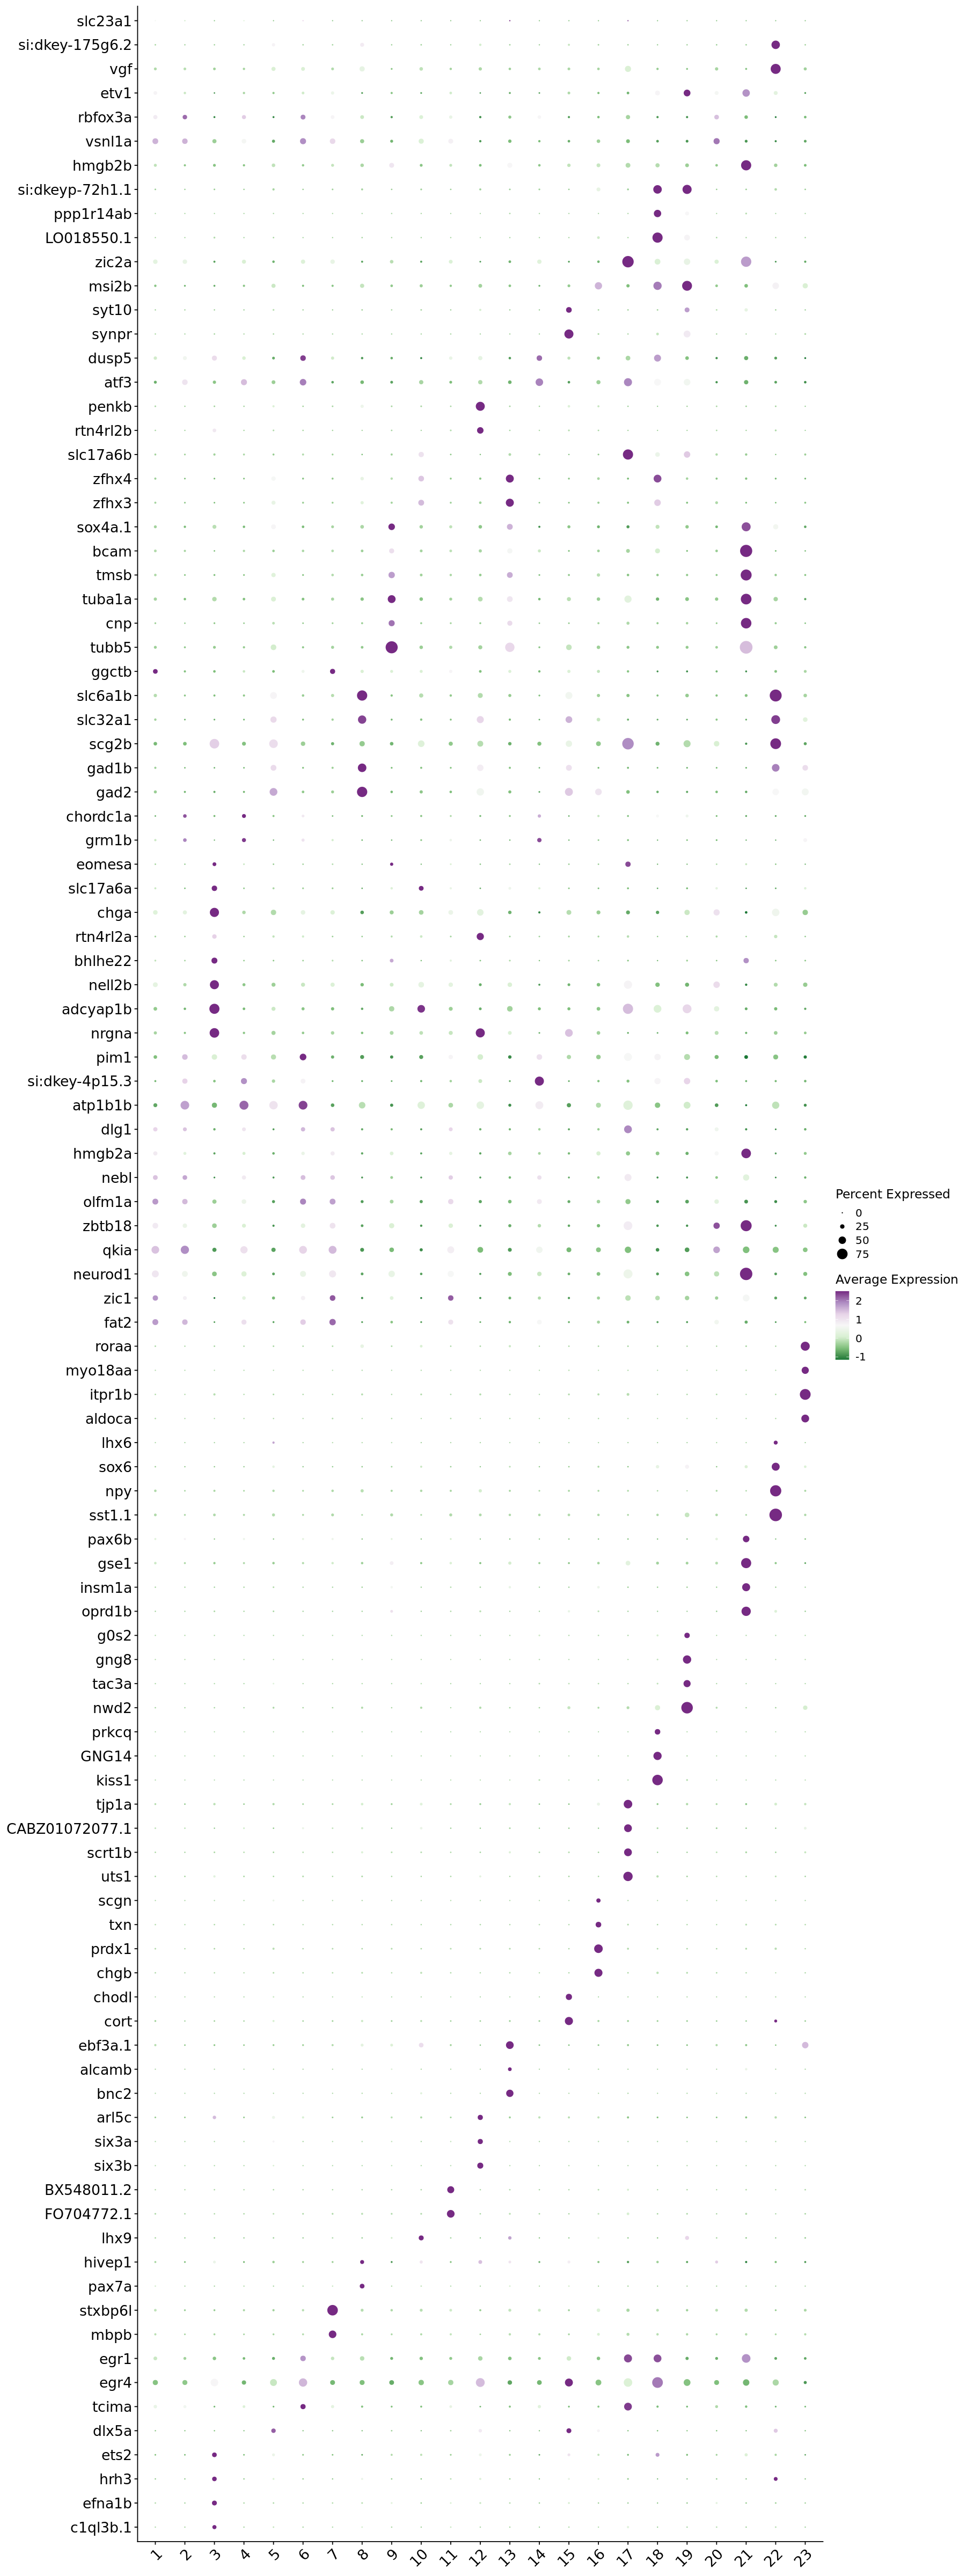

In [13]:
options(repr.plot.width=15, repr.plot.height=40)

dotplot_all <- DotPlot(neu_pool, features = all_markers_vector, cols = "PRGn") + 
    theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16), axis.title = element_blank()) + 
    RotatedAxis() + 
    coord_flip()
dotplot_all 

In [15]:
#save figure pdf
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/neu_dotplot_all_.pdf",
       plot = dotplot_all, units = "in", height = 40, width = 15)

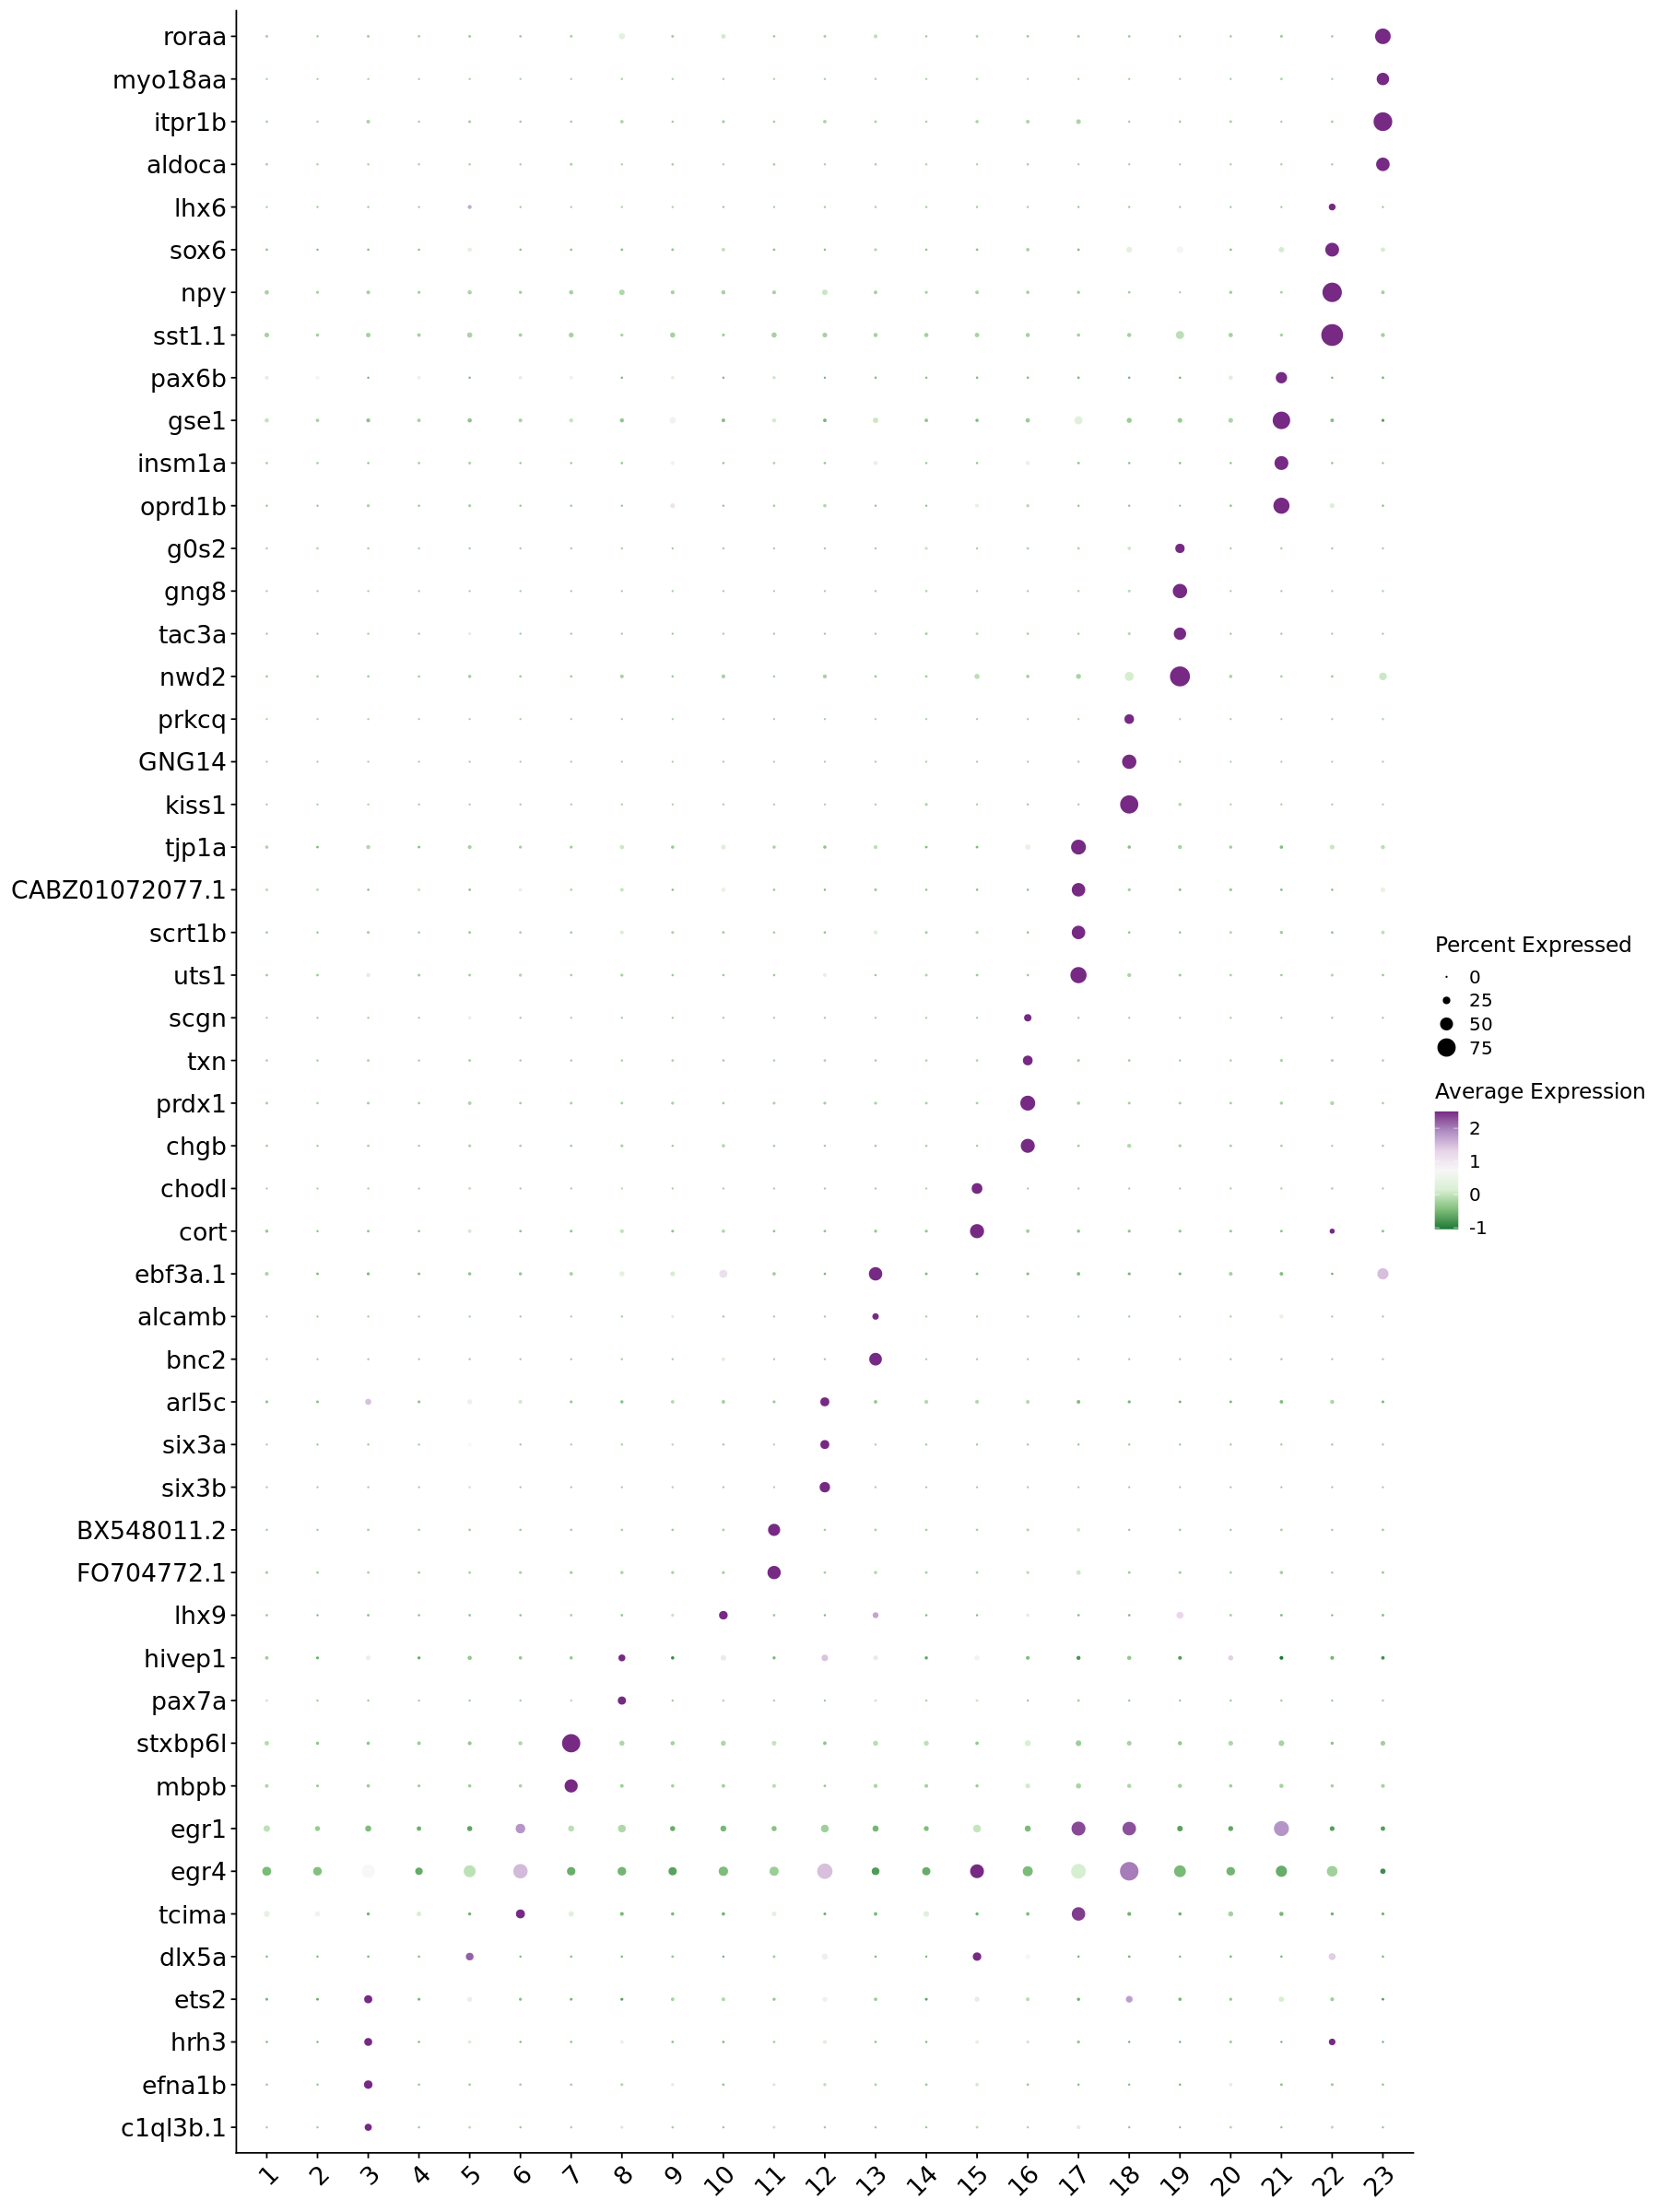

In [10]:
options(repr.plot.width=15, repr.plot.height=20)

dotplot_unique <- DotPlot(neu_pool, features = unique_markers_vector, cols = "PRGn") + 
    theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16), axis.title = element_blank()) + 
    RotatedAxis() + 
    coord_flip()
dotplot_unique 

In [12]:
#save figure pdf
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/neu_dotplot_unique.pdf",
       plot = dotplot_unique, units = "in", height = 20, width = 15)

#### Markers from Raj 2020

Warning message in FetchData(object = object, vars = features, cells = cells):
“The following requested variables were not found: eng1b, otx1b, sst3, cacng2b”


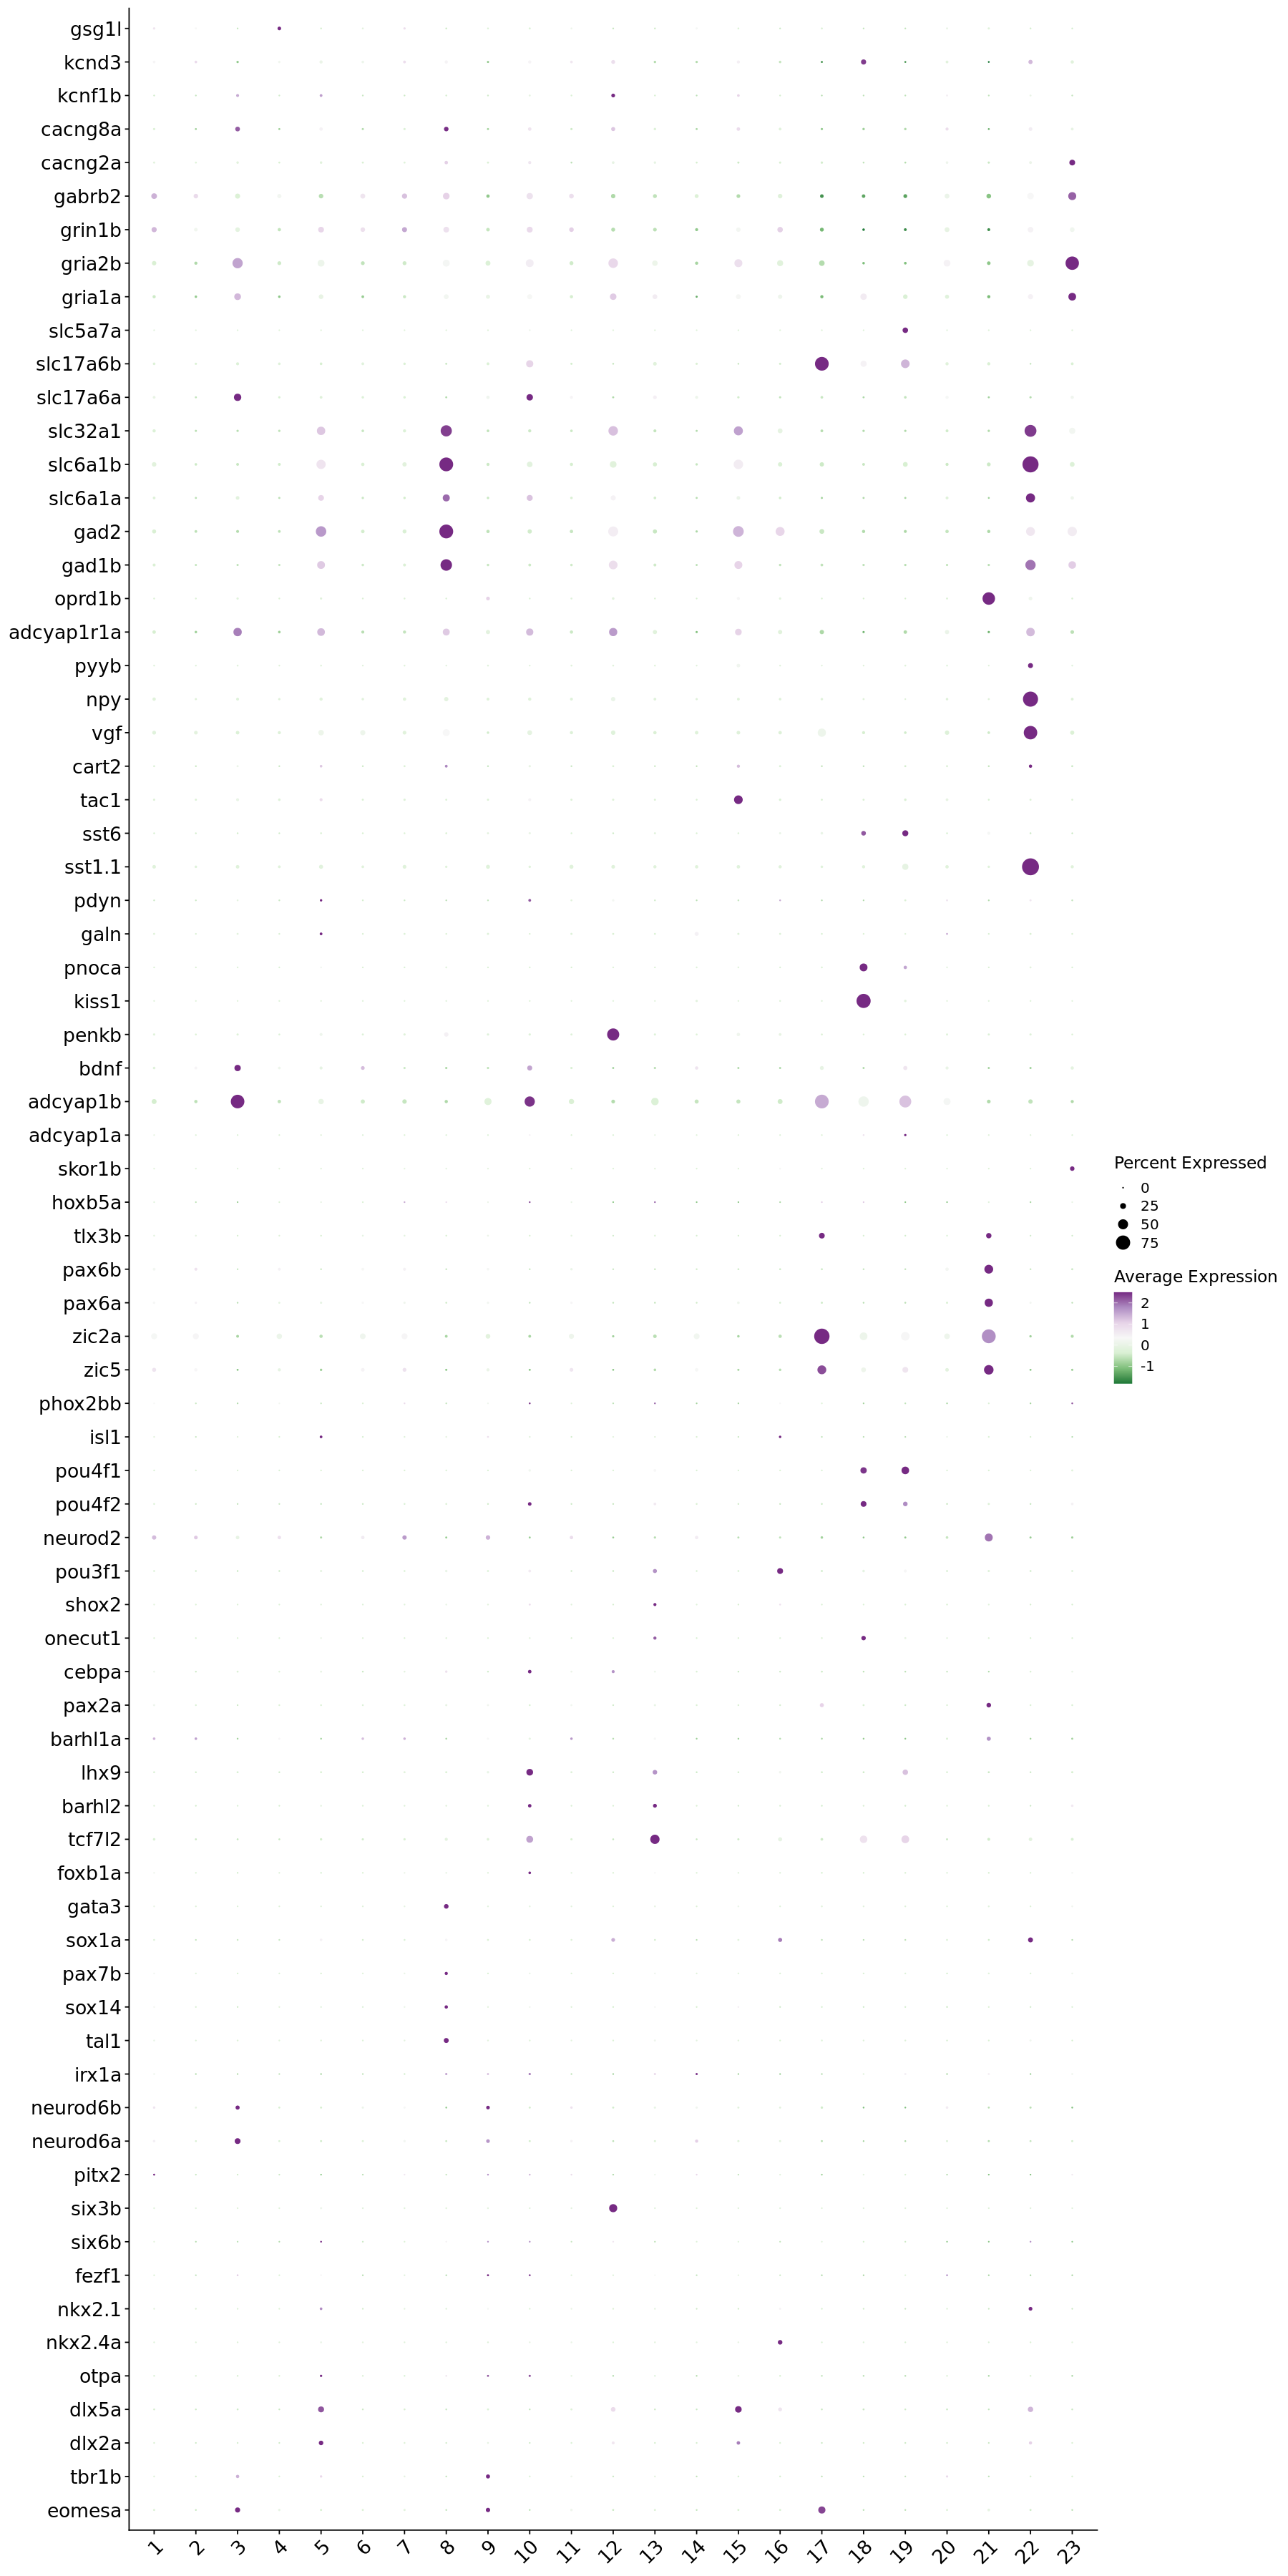

In [11]:
options(repr.plot.width=15, repr.plot.height=30)

dotplot_raj <- DotPlot(neu_pool, features = raj_2020_neu, cols = "PRGn") + 
    theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16), axis.title = element_blank()) + 
    RotatedAxis() + 
    coord_flip()
dotplot_raj 

In [13]:
#save figure pdf
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/neu_dotplot_raj.pdf",
       plot = dotplot_raj, units = "in", height = 30, width = 15)

#### Brain region barplot

In [24]:
# use data frame calculated in section above
p_br_diss <- ggplot(data = brain.reg.by.cluster.diss.df, aes(x = Cluster, y = Fraction, fill = Brain.reg)) + 
    geom_bar(stat="identity") + 
    coord_cartesian(ylim = c(0,1)) + 
    labs(x="Cluster", y="Fraction") +  
    theme(axis.title = element_text(size = 18), axis.text = element_text(size = 16),   plot.title = element_text(size = 16, hjust = 0.5), legend.text = element_text(size = 20), legend.title = element_text(size = 22), legend.position = "bottom")  + 
    coord_flip() + 
    scale_fill_manual(values = reg_colors, name = "Brain region", limits = c("tel", "dien", "mes", "rhom"))

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



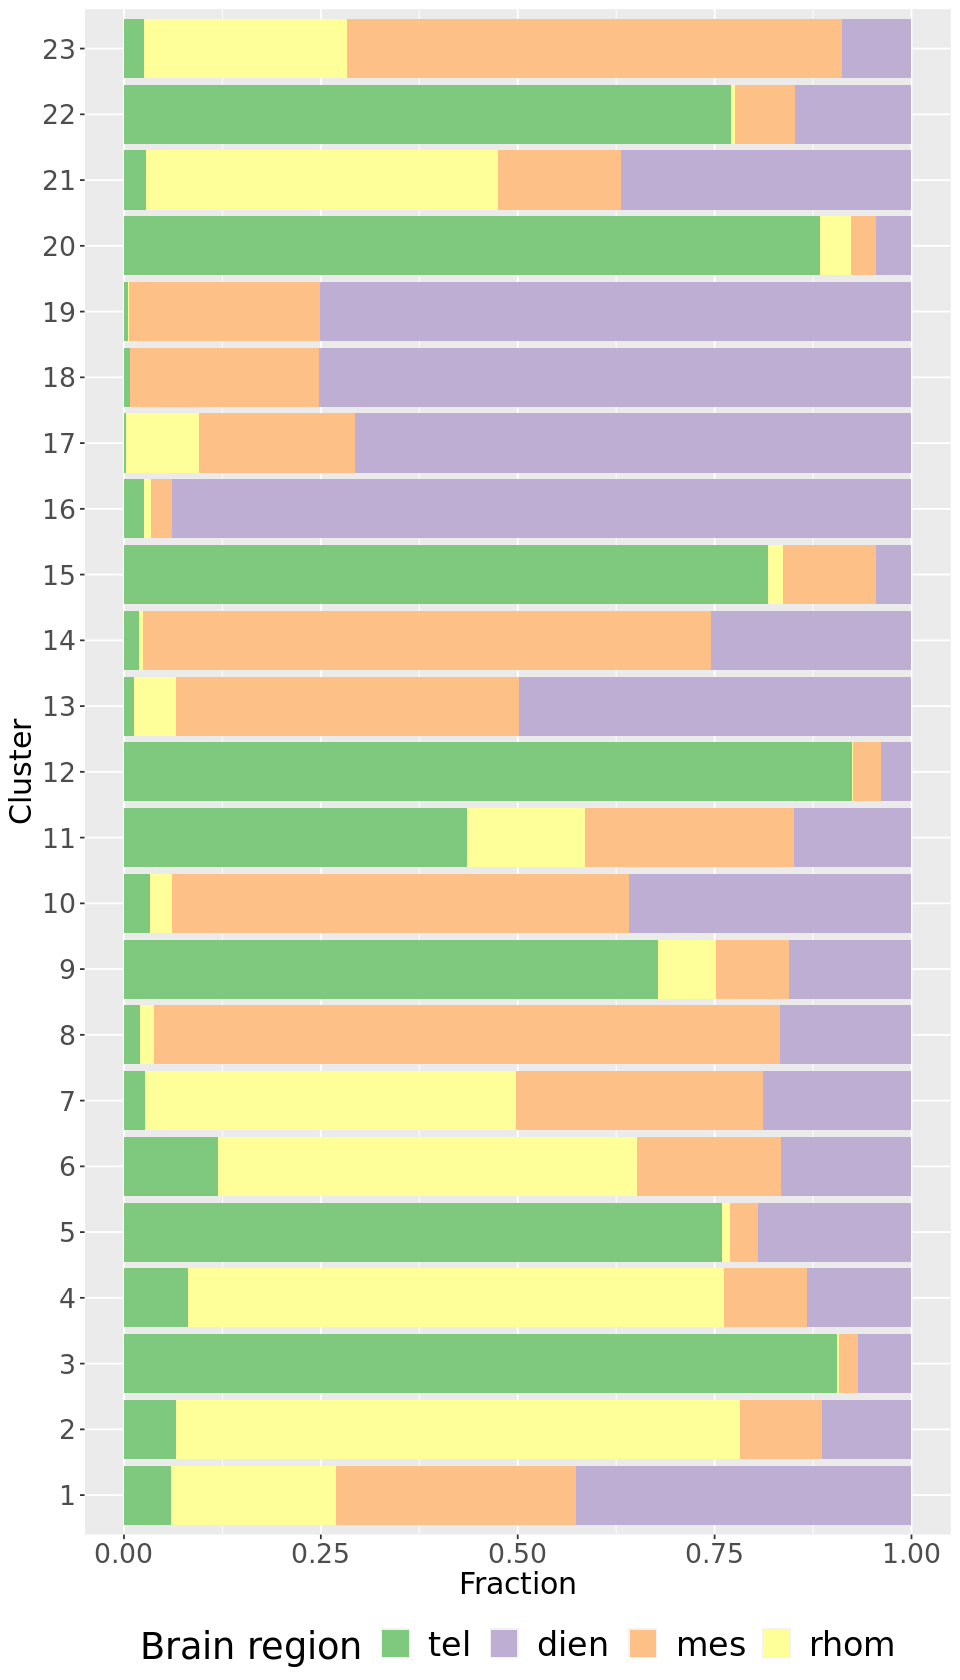

In [25]:
options(repr.plot.width=8, repr.plot.height=14)

p_br_diss

In [26]:
#save figure pdf
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/neu_barplot_regions_s1.pdf",
       plot = p_br_diss, units = "in", height = 14, width = 8)

#### Regional specificity for named cluster - set exact size

In [3]:
brain.reg.by.cluster <- table(neu_pool$brain_reg, neu_pool$pc30_res0.8_biological_names_short_num)

In [4]:
brain.reg.by.cluster.diss <- brain.reg.by.cluster[c(1:4),]
brain.reg.by.cluster.diss

      
       1. Gran cells 2. Gran cells (rhom) 3. Neu glut (tel) 4. Gran cells
  dien          1874                  347               167           343
  mes           1703                  403                78           345
  rhom          1848                 4372                11          3513
  tel            394                  303              3365           316
      
       5. Neu gaba (tel) 6. Gran cells tcima+ 7. Gran cells stxbp6l+
  dien               312                  251                    230
  mes                 73                  353                    486
  rhom                32                 1618                   1156
  tel               1827                  272                     48
      
       8. Neu gaba (mes) 9. Neu new 10. Neu glut lhx9+ 11. Gran cells
  dien               302        135                568             29
  mes               1818        102               1161             65
  rhom                64        128                 91

In [5]:
#margin = 1 sums across rows (how is brain reg distributed over clusters)
brain.reg.by.cluster.diss.norm <- round(prop.table(brain.reg.by.cluster.diss, margin = 1), digits = 10)
#brain.reg.by.cluster.norm <- brain.reg.by.cluster.perc1 * 100

In [6]:
brain.reg.by.cluster.diss.norm

      
       1. Gran cells 2. Gran cells (rhom) 3. Neu glut (tel) 4. Gran cells
  dien  0.2854096863         0.0528480049      0.0254340542  0.0522388060
  mes   0.2049584788         0.0485016247      0.0093874112  0.0415212420
  rhom  0.1406071673         0.3326485582      0.0008369474  0.2672905729
  tel   0.0399108590         0.0306928687      0.3408630470  0.0320097245
      
       5. Neu gaba (tel) 6. Gran cells tcima+ 7. Gran cells stxbp6l+
  dien      0.0475175145         0.0382272312           0.0350289369
  mes       0.0087856541         0.0424840534           0.0584907931
  rhom      0.0024347561         0.1231073575           0.0879555657
  tel       0.1850688817         0.0275526742           0.0048622366
      
       8. Neu gaba (mes)   9. Neu new 10. Neu glut lhx9+ 11. Gran cells
  dien      0.0459945172 0.0205604630       0.0865062443   0.0044166920
  mes       0.2187988928 0.0122758455       0.1397280058   0.0078228427
  rhom      0.0048695123 0.0097390246       0.00

In [7]:
#margin = 2 sums across columns (which brain regs make up each cluster) - this is what I need for per cluster calculation
#use as input rowwise normalized data
brain.reg.by.cluster.diss.df <- as.data.frame(round(prop.table(brain.reg.by.cluster.diss.norm, margin = 2), digits = 10))
colnames(brain.reg.by.cluster.diss.df) <- c("Brain.reg", "Cluster", "Fraction")

In [8]:
head(brain.reg.by.cluster.diss.df)

,Brain.reg,Cluster,Fraction
,<fct>,<fct>,<dbl>
1,dien,1. Gran cells,0.42542191
2,mes,1. Gran cells,0.30550410
3,rhom,1. Gran cells,0.20958423
4,tel,1. Gran cells,0.05948976
5,dien,2. Gran cells (rhom),0.11372718
6,mes,2. Gran cells (rhom),0.10437391


In [9]:
# pallette for brain regions based on https://colorbrewer2.org/#type=qualitative&scheme=Accent&n=5
reg_colors <- c("tel" = "#7fc97f", #green
                "dien" = "#beaed4", #purple
                "mes" = "#fdc086", #orange
                "rhom" = "#ffff99", #yellow
                "whole" = "#386cb0" #blue
                )

Use additional function from ggh4x package to define panel size (so I can keep bar size consistent across different datasets).  

In [10]:
# adjusted text sizes, no legend
p_br_diss <- ggplot(data = brain.reg.by.cluster.diss.df, aes(x = Cluster, y = Fraction, fill = Brain.reg)) +
    geom_bar(stat="identity") + 
    coord_cartesian(ylim = c(0,1)) + 
    labs(x="", y="Fraction", title = "Neurons") +  
    theme(axis.title = element_text(size = 6.5), axis.text = element_text(size = 5), axis.text.x = element_text(angle = 45, hjust = 1, vjust = 0.95), plot.title = element_text(size = 7), 
        legend.position = "none",
         panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_rect(fill = "white"))  +
    scale_fill_manual(values = reg_colors, name = "Brain region", limits = c("tel", "dien", "mes", "rhom")) +
    force_panelsizes(rows = unit(35, "mm"),
                   cols = unit(103.5, "mm"))

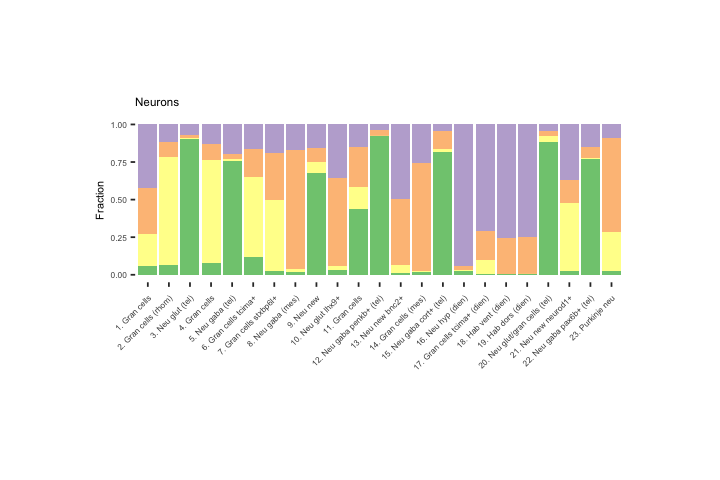

In [11]:
options(repr.plot.width=6, repr.plot.height=4)

p_br_diss

In [12]:
#save figure pdf
#full y axis not visible at 55 mm so I increased to 57
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/neu_barplot_regions_setsize.pdf",
       plot = p_br_diss, units = "mm", height = 62, width = 113.5)

##### Draw legend separately for Fig2

Based on tutorial: https://statisticsglobe.com/draw-ggplot2-legend-without-plot-in-r

In [35]:
library(grid)
library(gridExtra)
library(cowplot)

In [49]:
# adjusted text sizes, include legend
p_br_diss <- ggplot(data = brain.reg.by.cluster.diss.df, aes(x = Cluster, y = Fraction, fill = Brain.reg)) +
    geom_bar(stat="identity") + 
    coord_cartesian(ylim = c(0,1)) + 
    labs(x="", y="Fraction") +  
    theme(axis.title = element_text(size = 6.5), axis.text = element_text(size = 5), axis.text.x = element_text(angle = 45, hjust = 1, vjust = 0.95), 
        legend.position = "top", legend.key.size = unit(0.5, 'cm'), legend.text = element_text(size = 6.5), legend.title = element_text(size = 8))  +
    scale_fill_manual(values = reg_colors, name = "Brain region", 
                      breaks = c("tel", "dien", "mes", "rhom"),
                     labels = c("telencephalon", "diencephalon", "mesencephalon", "rhombencephalon")) +
    force_panelsizes(rows = unit(35, "mm"),
                   cols = unit(103.5, "mm"))

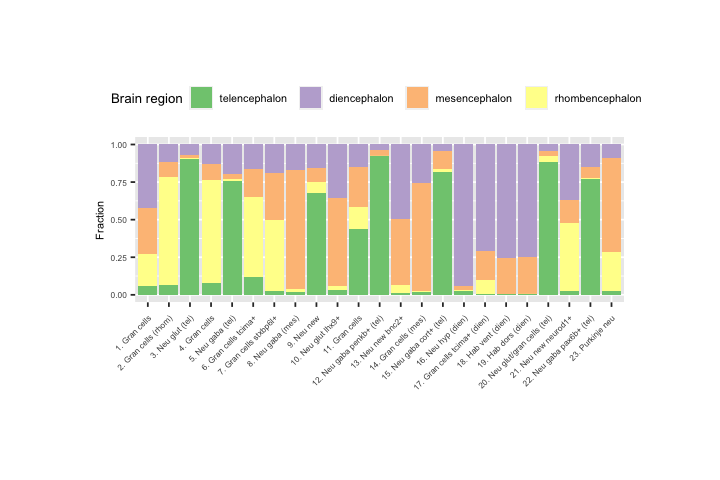

In [50]:
p_br_diss

In [51]:
leg_br <- get_legend(p_br_diss)

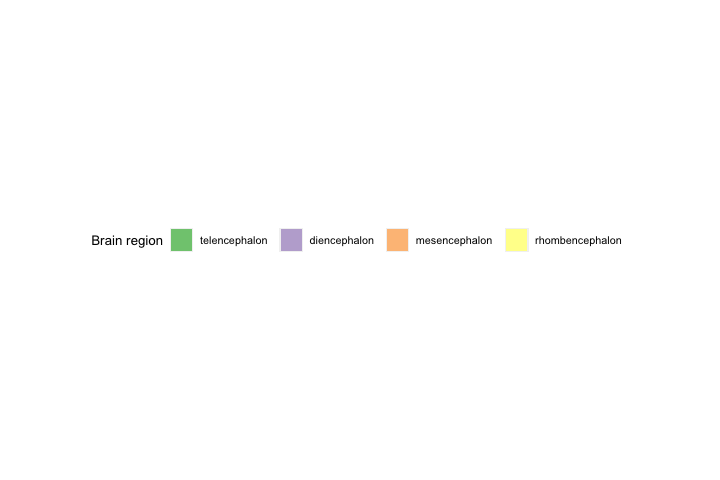

In [52]:
grid.newpage()                   
grid.draw(leg_br)

In [55]:
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/br_barplot_legend.pdf",
       plot = leg_br, units = "mm", height = 10, width = 120)

### Export annotation (detailed cell types)

In [82]:
str(neu_pool@meta.data)

'data.frame':	64582 obs. of  33 variables:
 $ orig.ident                         : chr  "b1_tel" "b1_tel" "b1_tel" "b1_tel" ...
 $ nCount_RNA                         : num  4597 2350 692 1291 2354 ...
 $ nFeature_RNA                       : int  1522 1038 230 652 1027 1365 964 350 584 279 ...
 $ multiseq.relative.1.7              : chr  NA NA NA NA ...
 $ brain_reg                          : chr  "tel" "tel" "tel" "tel" ...
 $ kit_chem                           : chr  "3prim_v1" "3prim_v1" "3prim_v1" "3prim_v1" ...
 $ fixation                           : chr  "fresh" "fresh" "fresh" "fresh" ...
 $ percent.mt                         : num  0.247 0.375 1.616 0.234 0.456 ...
 $ ident                              : chr  "b1_tel" "b1_tel" "b1_tel" "b1_tel" ...
 $ scDblFinder.class                  : chr  "singlet" "singlet" "singlet" "singlet" ...
 $ scDblFinder.score                  : num  0.9092 0.7495 0.0435 0.2527 0.4727 ...
 $ scDblFinder.weighted               : num  0.838 0.817 0.25

In [15]:
neu_pool_ann <- data.frame("Barcode" = neu_pool@assays$RNA@counts@Dimnames[[2]],                          
                           "Orig_ident" = neu_pool$orig.ident,
                           "Brain_reg_lib" = neu_pool$brain_reg,
                           "Fixation" = neu_pool$fixation,
                           "Celltype_major" = neu_pool$major_celltypes_pc28_res0.6,
                           "Celltype_detailed" = neu_pool$pc30_res0.8_biological_names,
                           "Celltype_detailed_short" = neu_pool$pc30_res0.8_biological_names_short,
                           "Keep_in_final" = TRUE,
                          "Region_simple" = neu_pool$pc30_res0.8_regional_simple, 
                          "Region_detailed" = neu_pool$pc30_res0.8_regional_detailed,
                          "Region_score_max" = neu_pool$pc30_res0.8_max_fraction,
                          "Region_score_max_name" = neu_pool$pc30_res0.8_region_max_fraction,
                          "Region_score_tel" = neu_pool$pc30_res0.8_fraction_tel,
                          "Region_score_dien" = neu_pool$pc30_res0.8_fraction_dien,
                          "Region_score_mes" = neu_pool$pc30_res0.8_fraction_mes,
                          "Region_score_rhom" = neu_pool$pc30_res0.8_fraction_rhom
                          )

head(neu_pool_ann)

,Barcode,Orig_ident,Brain_reg_lib,Fixation,Celltype_major,Celltype_detailed,Celltype_detailed_short,Keep_in_final,Region_simple,Region_detailed,Region_score_max,Region_score_max_name,Region_score_tel,Region_score_dien,Region_score_mes,Region_score_rhom
,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<lgl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
B1.T_AAAGAGACGGATTC-1,B1.T_AAAGAGACGGATTC-1,b1_tel,tel,fresh,Neurons,Neurons glutamatargic (tel),Neu glut (tel),TRUE,Regional,Tel,0.91,tel_0.91,0.91,0.07,0.02,0.00
B1.T_AAAGAGACTAGACC-1,B1.T_AAAGAGACTAGACC-1,b1_tel,tel,fresh,Neurons,Neurons gabaergic penkb+ (tel),Neu gaba penkb+ (tel),TRUE,Regional,Tel,0.92,tel_0.92,0.92,0.04,0.04,0.00
B1.T_AAAGAGACTCTACT-1,B1.T_AAAGAGACTCTACT-1,b1_tel,tel,fresh,Neurons,Neurons glutamatargic (tel),Neu glut (tel),TRUE,Regional,Tel,0.91,tel_0.91,0.91,0.07,0.02,0.00
B1.T_AAAGGCCTAGATCC-1,B1.T_AAAGGCCTAGATCC-1,b1_tel,tel,fresh,Neurons,Neurons gabaergic pax6b+ (tel),Neu gaba pax6b+ (tel),TRUE,Regional,Tel,0.77,tel_0.77,0.77,0.15,0.08,0.01
B1.T_AAATACTGGAATAG-1,B1.T_AAATACTGGAATAG-1,b1_tel,tel,fresh,Neurons,Granule cells,Gran cells,TRUE,Global,Multi,0.44,tel_0.44,0.44,0.15,0.27,0.15
B1.T_AAATCAACCTGCTC-1,B1.T_AAATCAACCTGCTC-1,b1_tel,tel,fresh,Neurons,Neurons glutamatargic (tel),Neu glut (tel),TRUE,Regional,Tel,0.91,tel_0.91,0.91,0.07,0.02,0.00


In [16]:
write.csv(neu_pool_ann, file = "/local/Nina/jupyterlab/brains_trans/ann_neu_pool_reg_30pcs_res0-8.csv")

In [13]:
dim(neu_pool)

[1] 24332 64582